### Nama: Laily Nissa Atul Mualifah
 __________________________________________________________________

<h1><center>Pemodelan Statistical Machine Learning</center></h1>

## Keterangan Data
Airbnb adalah situs web jasa penyewaan rumah milik pribadi yang memungkinkan pemilik rumah menyewakan properti untuk tamu yang mencari tempat tinggal. Berperan sebagai agregator untuk pemilik rumah dan tamu, valuasi total Airbnb melebihi 31 Miliar dolar pada Mei 2017, dengan 4,5 juta properti terdaftar di 191+ negara. Airbnb menawarkan kebebasan penuh kepada pemilik rumah untuk memasang harga properti mereka, dengan hanya petunjuk minimal yang memungkinkan tuan rumah membandingkan tempat serupa di lingkungan mereka untuk mendapatkan harga yang kompetitif. Pemilik rumah dapat memasukkan harga premium untuk fasilitas tambahan. Dengan meningkatnya jumlah tuan rumah yang menggunakan Airbnb, mencari harga yang tepat untuk tetap kompetitif di lingkungan tuan rumah sangatlah penting. Pada tugas sesi UTS ini akan dilakukan pemodelan regresi untuk memperkirakan harga rumah di Airbnb. Variabel-variabel yang digunakan beserta keterangannya adalah sebagai berikut:
1. id : nomor listing rumah
2. property_type : tipe properti
3. room_type: tipe ruangan
4. amenities: Fasilitas tambahan
5. accommodates: banyaknya tamu yang bisa menginap
6. bathrooms: banyaknya kamar mandi (untuk maksud dari desimal kunjungi link https://www.thetruthaboutrealty.com/half-bath-vs-full-bath-wheres-the-value/)
7. bed_type: tipe ranjang
8. cancellation_policy: apakah boleh cancel?
9. cleaning_fee: biaya kebersihan
10. city: nama kota
11. description: deskripsi listing
12. first_review: waktu yang menunjukkan munculnya review pertama
13. host_has_profile_pic: apakah pemilik rumah punya foto profil?
14. host_identity_verified: pemilik rumah sudah terverifikasi
15. host_response_rate: rata-rata waktu respon pemilik rumah
16. host_since : menjadi pemilik rumah di airbnb sejak kapan
17. instant_bookable: apakah bisa dibooking secara instan
18. last_review: waktu yang menunjukkan munculnya review terakhir
19. latitude: lintang
20. longitude: bujur
21. name: nama listings
22. neighbourhood: kota tetangga
23. number_of_reviews: banyaknya review
24. review_scores_rating: rating skor
25. thumbnail_url: url thumbnail
26. zipcode: kode pos
27. bedrooms: banyaknya kamar tidur
28. beds: banyaknya tempat tidur
29. price: harga listings

## Import Data

Sebelum mengimport data dan melakukan analisis data dibutuhkan beberapa package atau pip dasar, antara lain **pandas** (untuk olah data tipe dataframe), **matplotlib** dan **seaborn** (untuk visualisasi).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price
0,6901257,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,150.0
1,6304928,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,169.0
2,7919400,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,145.0
3,13418779,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,750.0
4,3808709,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,115.0


In [4]:
test.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,17423675,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.5,Real Bed,strict,True,LA,...,33.875862,-118.403293,Sand Section Beach Bungalow,Hermosa Beach,29,97.0,NaN,90254,2.0,2.0
1,6226658,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.5,Real Bed,moderate,True,Chicago,...,41.908240,-87.695242,Sweet Home Chicago,Humboldt Park,0,NaN,https://a0.muscache.com/im/pictures/996e04cd-5...,60622,1.0,1.0
2,3563677,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,moderate,True,LA,...,34.047003,-118.267352,"LOFT WITH VIEW, Convention center!",Downtown,73,99.0,https://a0.muscache.com/im/pictures/d1a617c2-5...,90015,1.0,1.0
3,17615783,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,moderate,True,LA,...,34.175360,-118.430904,Private Rm. 1Blk. From Sherman Oaks,Valley Glen,2,100.0,https://a0.muscache.com/im/pictures/14384442/4...,91401,1.0,1.0
4,2479317,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",4,1.0,Real Bed,moderate,True,DC,...,38.911275,-77.037272,Dupont 1 bedroom - 1 mile from the White House!,Dupont Circle,0,NaN,https://a0.muscache.com/im/pictures/a24c135a-0...,20009,1.0,2.0


## Exploratory Data
Untuk melihat struktur data dan memahami bentuk maupun sebaran data maka dilakukan ekspolasi data. Eksplorasi data dilakukan dengan beberapa fungsi seperti **shape** untuk melihat ukuran atau dimensi data, **info** untuk melihat struktur data, **describe** untuk melihat ringkasan data, dan **is.null** untuk melihat apakah ada data kosong.

In [5]:
train.shape

(51879, 29)

In [6]:
#melihat informasi/ struktur data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51879 entries, 0 to 51878
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      51879 non-null  int64  
 1   property_type           51879 non-null  object 
 2   room_type               51879 non-null  object 
 3   amenities               51879 non-null  object 
 4   accommodates            51879 non-null  int64  
 5   bathrooms               51735 non-null  float64
 6   bed_type                51879 non-null  object 
 7   cancellation_policy     51879 non-null  object 
 8   cleaning_fee            51879 non-null  bool   
 9   city                    51879 non-null  object 
 10  description             51879 non-null  object 
 11  first_review            40865 non-null  object 
 12  host_has_profile_pic    51751 non-null  object 
 13  host_identity_verified  51751 non-null  object 
 14  host_response_rate      39125 non-null

Berdasarkan info di atas dapat dilihat bahwa data training memiliki sebanyak 51879 baris dengan 29 kolom/ peubah. Struktur data terdiri dari data numerik yang ditunjukkan oleh dtype int64 (integer), float64 (pecahan) dan data string yang ditunjukkan oleh dtype object dan juga bool yang berarti data boolean (true,false). Untuk melihat ringkasan statistik dari masing-masing tipe data (numerik dan string) digunakan fungsi **describe**.

### Data Non-Numerik

In [7]:
#Melihat ringkasan statistik data object
train.describe(include=['O'])

,property_type,room_type,amenities,bed_type,cancellation_policy,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,name,neighbourhood,thumbnail_url,zipcode
count,51879,51879,51879,51879,51879,51879,51879,40865,51751,51751,39125,51751,51879,40890,51879,47105,46114,51209
unique,35,3,47806,5,5,6,51540,2432,2,2,77,3025,2,1259,51493,599,46109,728
top,Apartment,Entire home/apt,{},Real Bed,strict,NYC,"Hello, I've been running guest house for Korea...",2017-01-01,t,t,100%,2015-03-30,f,2017-04-30,Bunk bed in the Treat Street Clubhouse,Williamsburg,https://a0.muscache.com/im/pictures/70087089/b...,11211.0
freq,34370,28966,428,50391,22720,22655,6,198,51592,34838,30309,156,38325,929,6,2053,2,980


Pada deskripsi data tipe string, ringkasan berisi jumlah data (jumlah baris yang terisi) pada setiap kolom/peubah yang ditunjukkan oleh baris count, jumlah data berbeda ditunjukkan oleh baris unique, nilai data terbanyak ditunjukkan oleh baris top dan jumlah data terbanyak ditunjukkan oleh baris freq. Misalnya untuk kolom property_type terdapat 51879 data (baris) dengan 35 jenis properti, jenis properti terbanyak adalah Apartment sebanyak 34370 data. Untuk melihat sebaran data dari masing-masing kolom terhadap kolom price digunakan boxplot (kolom yang diplot hanya kolom dengan data unique kurang dari 100, hal ini dikarenakan alasan waktu komputasi).

In [8]:
box=[]
for kolom in train.select_dtypes(include=[object]).columns:
    if train[kolom].nunique()<100:
        box.append(kolom)

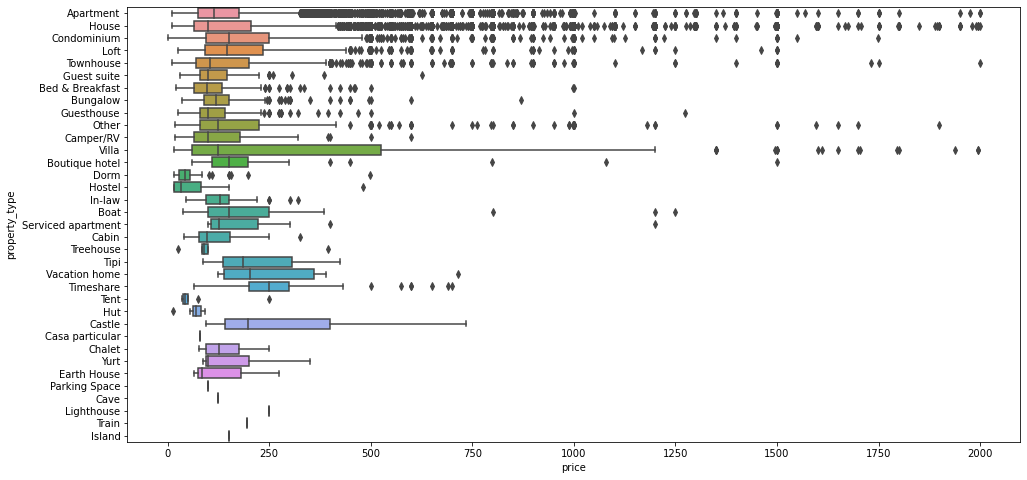

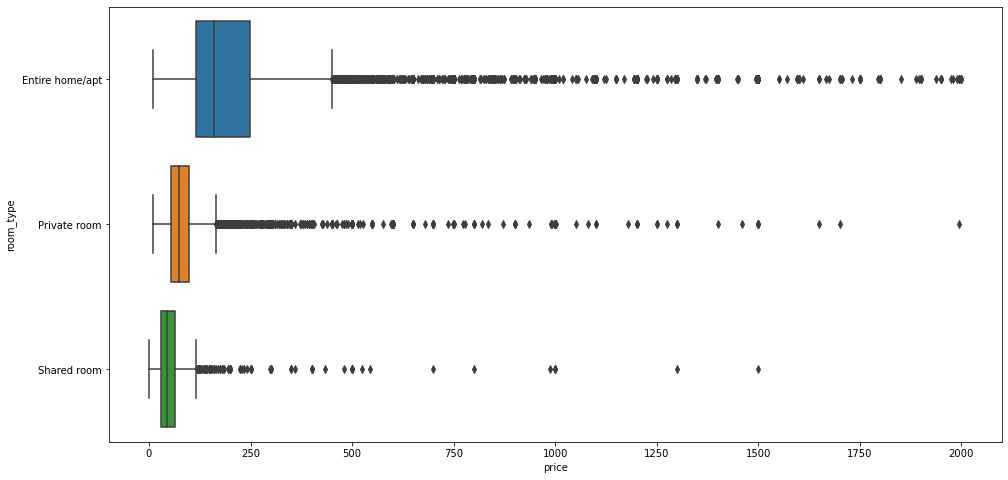

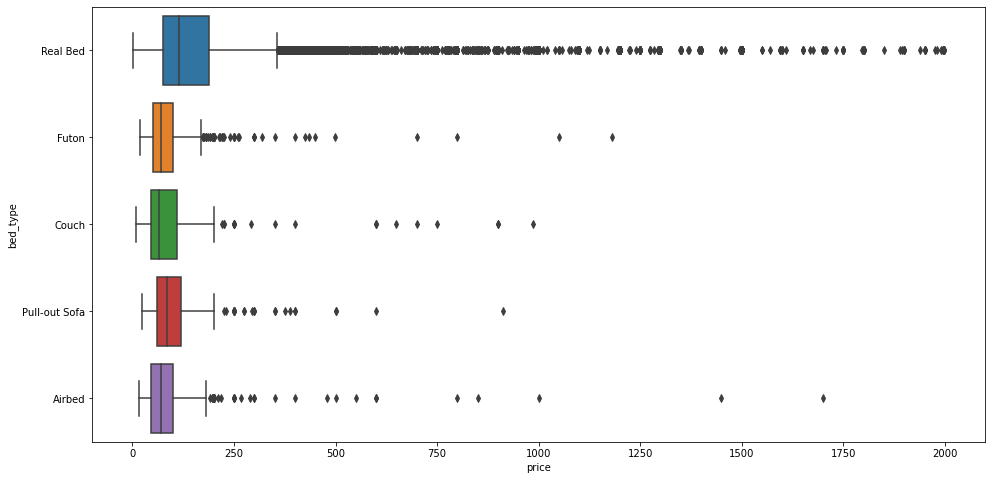

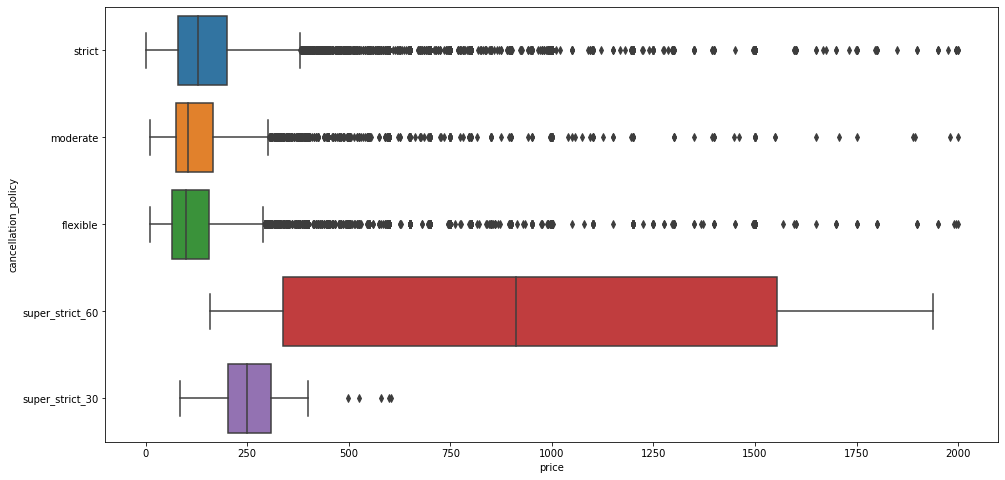

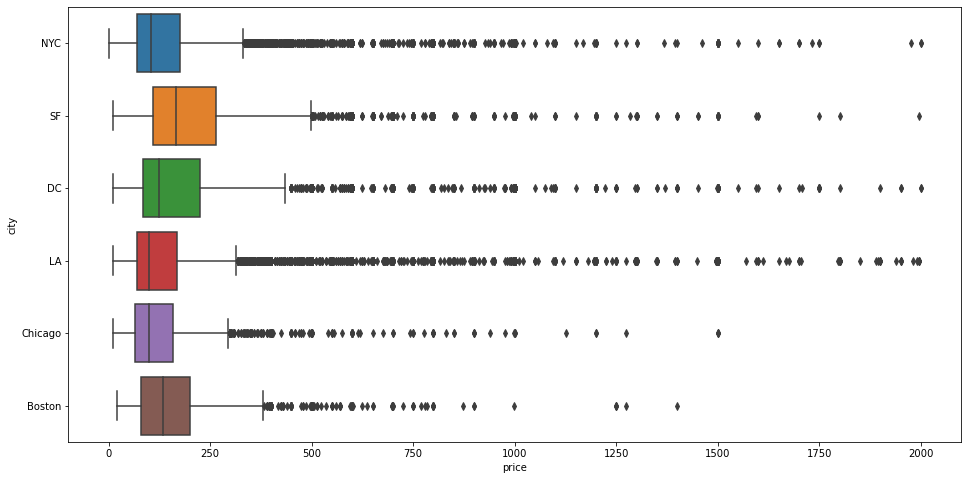

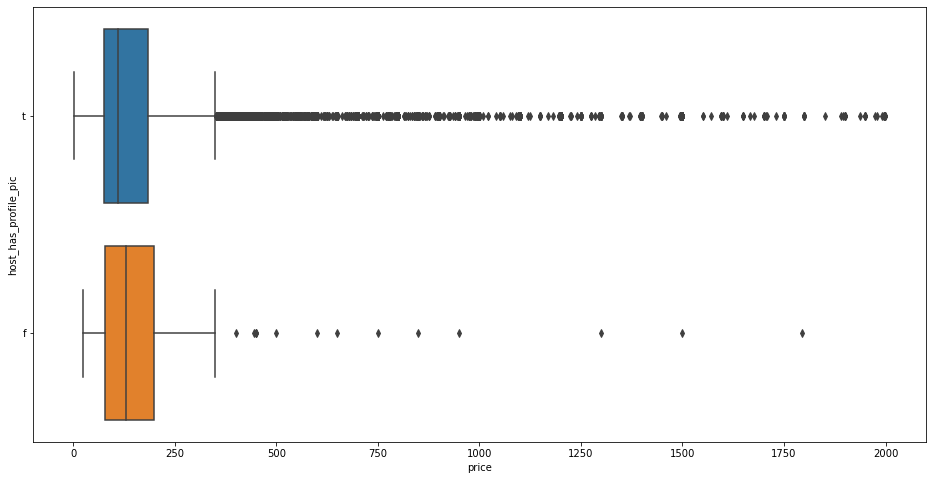

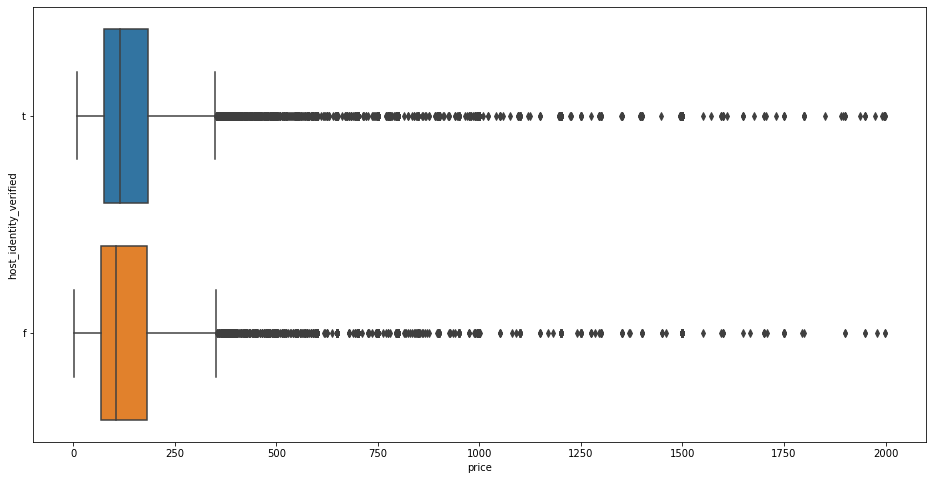

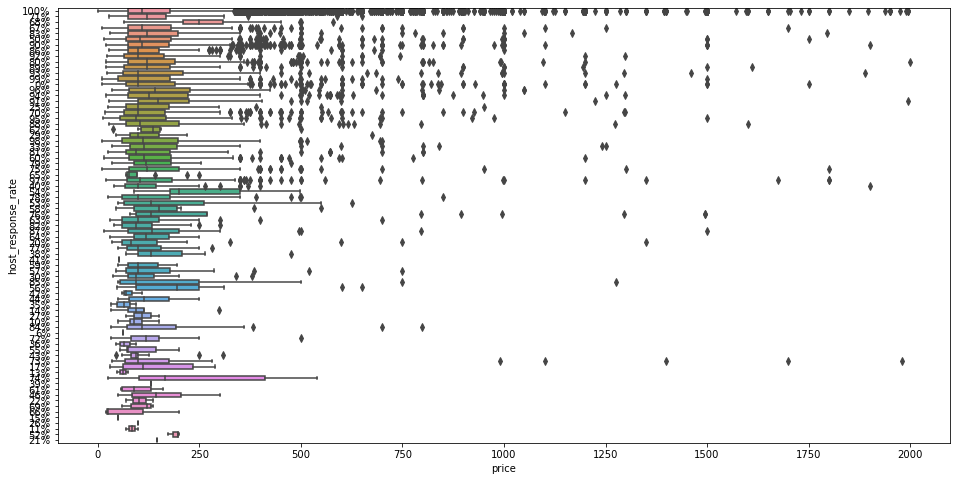

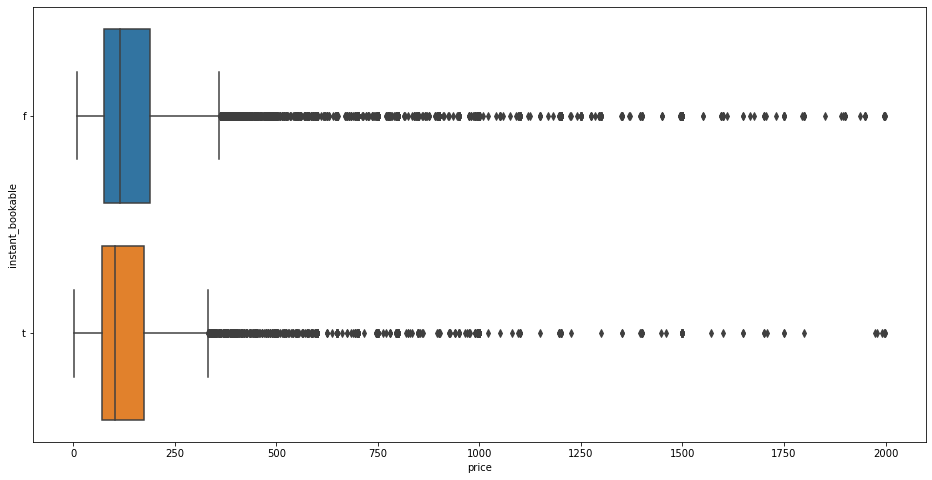

In [9]:
for kolom in box:
    plt.figure(figsize=(16,8))
    sns.boxplot('price',kolom,data=train)

Pada kolom property_type jenis villa memiliki range price yang paling besar, sementara untuk jenis yang lain beragam. Pada kolom room_type jenis entire home/apt memiliki rata-rata price tertinggi, dan jenis shared room terendah. Sementara kolom bed_type jenis real_bed memiliki rata-rata price tertinggi, untuk jenis lain tidak berbeda jauh. Kolom cancellation policy terlihat bahwa super_strict_60 memiliki rata-rata price tinggi dibanding jenis cancellation_policy yang lain, sedangkan tipe strict, moderate dan flexible rata-rata price nya tidak berbeda jauh. Pada kolom host_identity_verified dan instant_bookable rata-rata price pada masing-masing jenis tidak berbeda secara signifikan. Untuk mempermudah melihat sebaran data terhadap price digunakan plot density (plot hanya untuk kolom dengan data unique kurang dari 10000 karena alasan waktu komputasi)

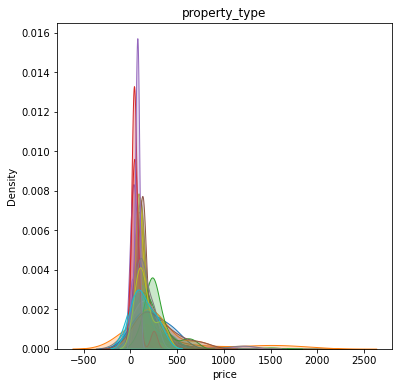

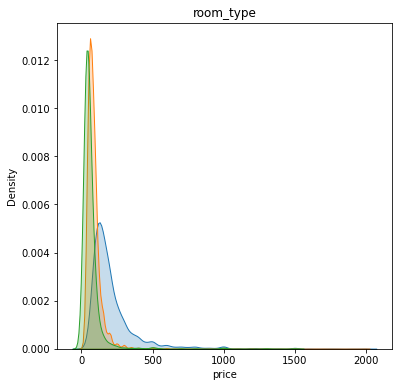

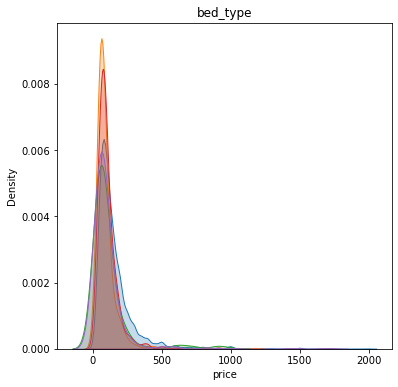

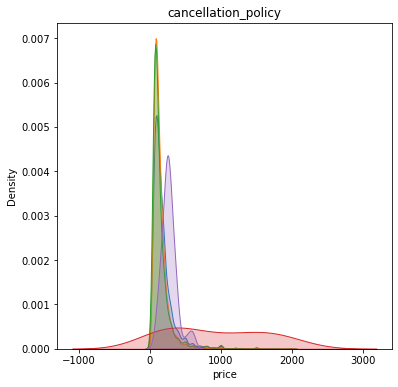

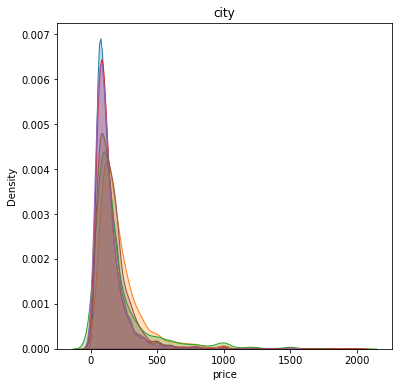

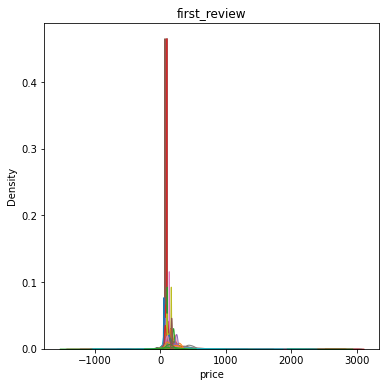

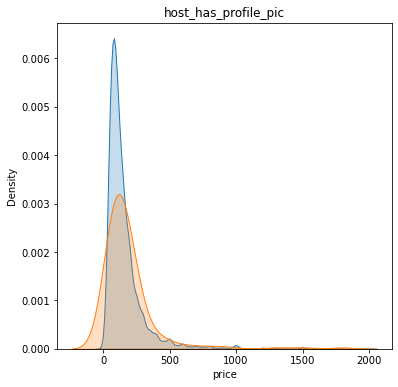

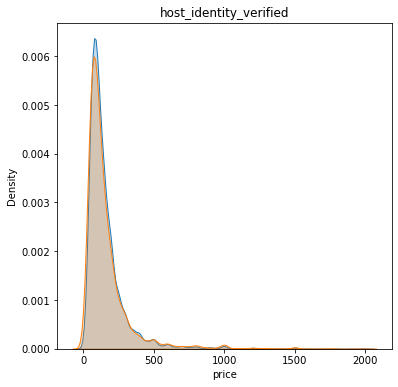

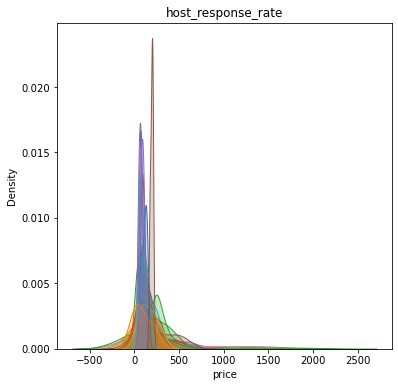

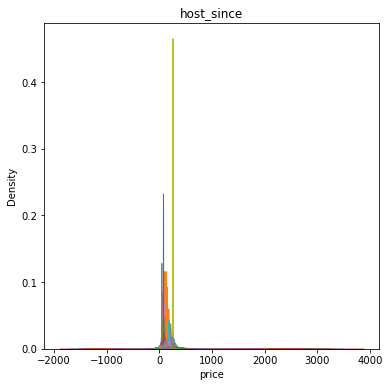

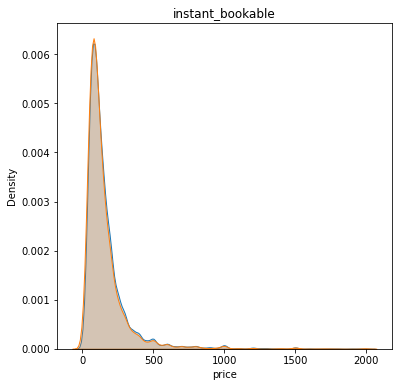

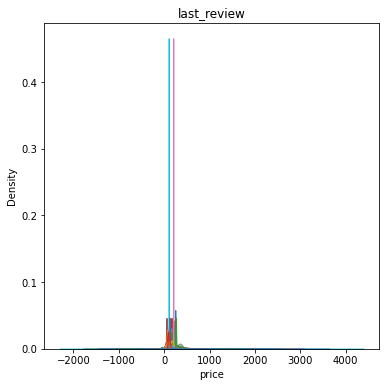

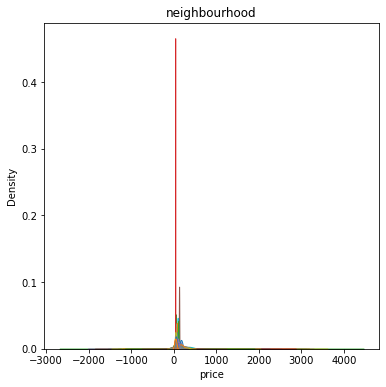

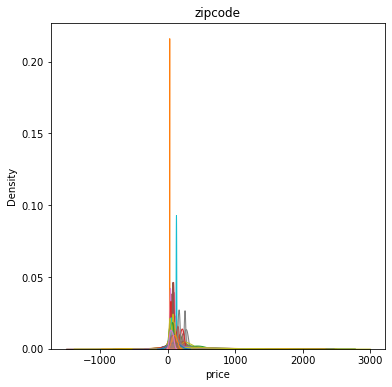

In [12]:
dens=[]
for kolom in train.select_dtypes(include=[object]).columns:
    if train[kolom].nunique()<10000:
        dens.append(kolom)
for kolom in dens:
    fig, ax = plt.subplots(figsize=(6,6))
    for jenis in train[kolom].unique():
        sns.kdeplot(train[train[kolom]==jenis]["price"], shade=True, ax=ax, label=jenis)
        ax.set_title(kolom)

### Data Numerik

In [11]:
#Melihat ringkasan statistik data numerik
train.describe()

,id,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,price
count,5.187900e+04,51879.000000,51735.000000,51879.000000,51879.000000,51879.000000,40258.000000,51813.000000,51795.000000,51879.000000
mean,1.128803e+07,3.150176,1.233507,38.442238,-92.433251,20.821488,94.077177,1.261093,1.707443,160.369051
std,6.083036e+06,2.155305,0.581548,3.080771,21.722403,37.490836,7.819335,0.849725,1.249720,168.928133
min,9.410000e+02,1.000000,0.000000,33.340916,-122.511500,0.000000,20.000000,0.000000,0.000000,1.000000
25%,6.297405e+06,2.000000,1.000000,34.124605,-118.342400,1.000000,92.000000,1.000000,1.000000,75.000000
50%,1.228226e+07,2.000000,1.000000,40.662195,-76.996542,6.000000,96.000000,1.000000,1.000000,111.000000
75%,1.640580e+07,4.000000,1.000000,40.745385,-73.954725,23.000000,100.000000,1.000000,2.000000,185.000000
max,2.122836e+07,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000,1999.000000


Ringkasan data tipe numerik berisi jumlah data (jumlah baris yang terisi), rata-rata, standar deviasi, nilai minimal, quartil pertama, quartil kedua, quartil ketiga, dan nilai maksimal. Untuk melihat sebaran data dari masing-masing kolom terhadap kolom price digunakan scatter plot.

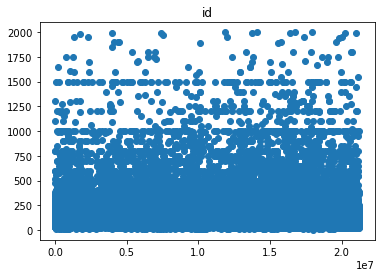

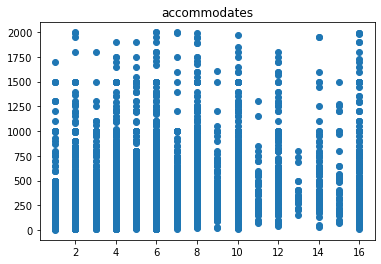

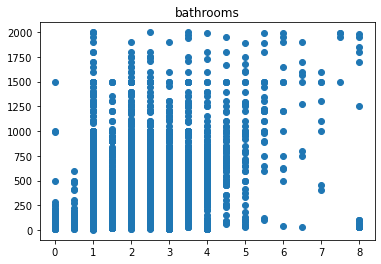

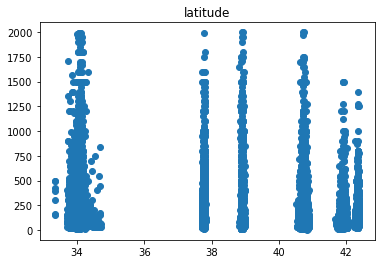

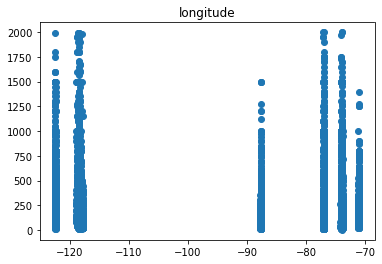

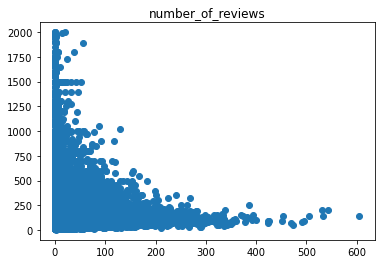

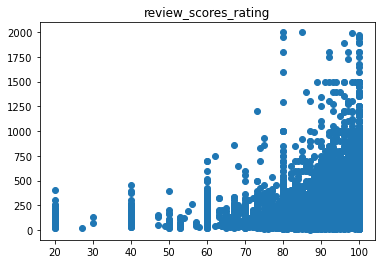

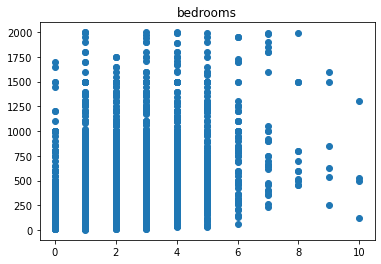

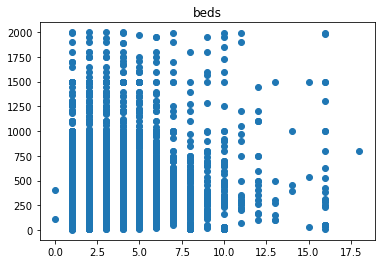

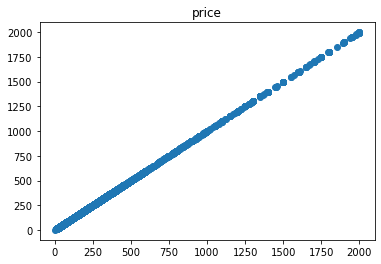

In [13]:
for kolom in train.select_dtypes(include=['int64','float64']).columns:
    plt.figure()
    plt.scatter(train[kolom],train.price)
    plt.title(kolom)
    plt.show()

### Missing Data
Selain melihat struktur dan ringkasan statistik data, hal lain yang perlu diperhatikan dalam exploratory data adalah missing data.

In [14]:
#melihat apakah terdapat missing value
train.isnull().sum()

id                            0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   144
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              11014
host_has_profile_pic        128
host_identity_verified      128
host_response_rate        12754
host_since                  128
instant_bookable              0
last_review               10989
latitude                      0
longitude                     0
name                          0
neighbourhood              4774
number_of_reviews             0
review_scores_rating      11621
thumbnail_url              5765
zipcode                     670
bedrooms                     66
beds                         84
price                         0
dtype: int64

In [15]:
test.isnull().sum()

id                           0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                   56
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
first_review              4850
host_has_profile_pic        60
host_identity_verified      60
host_response_rate        5545
host_since                  60
instant_bookable             0
last_review               4838
latitude                     0
longitude                    0
name                         0
neighbourhood             2098
number_of_reviews            0
review_scores_rating      5101
thumbnail_url             2451
zipcode                    296
bedrooms                    25
beds                        47
dtype: int64

Terdapat beberapa missing data (data kosong) pada data training maupun data testing. Untuk menangani missing data dapat dilakukan dengan menghilangkan baris yang memuat missing data atau dengan mengisi missing data dengan nilai tertentu. Pada pemodelan ini missing data diisi dengan data terbanyak (frekuensi terbanyak) pada masing-masing peubah.

In [19]:
missing=train.columns[train.isna().any()].tolist()
missing

['bathrooms',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'last_review',
 'neighbourhood',
 'review_scores_rating',
 'thumbnail_url',
 'zipcode',
 'bedrooms',
 'beds']

Hasil di atas merupakan nama-nama kolom/peubah yang memiliki missing data. Selanjutnya pada masing-masing kolom yang memiliki missing data diambil nilai data yang memiliki frekuensi terbanyak untuk dijadikan nilai masukan pada missing data. Untuk memperoleh data terbanyak menggunakan fungsi **value_count**.

In [95]:
train.bathrooms.value_counts()

1.0    40726
2.0     5564
1.5     2598
2.5     1114
3.0      711
3.5      291
4.0      199
0.5      165
0.0      141
4.5       79
5.0       52
8.0       30
5.5       29
6.0       15
6.5        9
7.0        8
7.5        4
Name: bathrooms, dtype: int64

Misalnya pada data training kolom bathrooms terdapat 17 data unique dengan frekuensi setiap data unique seperti di atas. Data dengan frekuensi terbanyak adalah 1.0, sehingga pada kolom bathrooms missing value diisi dengan nilai 1.0. Untuk mengisi missing data dengan suatu nilai menggunakan fungsi **fillna**.

In [20]:
for kolom in missing:
    train[kolom]=train[kolom].fillna(train[kolom].value_counts().index[0])
    test[kolom]=test[kolom].fillna(test[kolom].value_counts().index[0])

In [21]:
train.isnull().sum().sum()

0

In [22]:
test.isnull().sum().sum()

0

### Pelabelan Data Non-Numerik
Selanjutnya untuk melakukan pemodelan, data harus berupa numerik, sehingga data non numerik harus diubah atau dikodekan menjadi data numerik. Untuk mengkodekan data menjadi numerik menggunakan fungsi **LabelEncoder** dari package scikit learn.

In [23]:
from sklearn.preprocessing import LabelEncoder

Tipe data yang bisa dikodekan oleh fungsi **LabelEncoder** adalah numerik dan string. Fungsi ini mengkodekan suatu peubah tipe string menjadi numerik berdasarkan abjad, string akan dikodekan dari 0 sampai jumlah data unique sesuai urutan abjad. Beberapa peubah yaitu first_review, last_review dan host_since merupakan peubah tipe object, akan tetapi nilai-nilai data peubah tersebut bertipe datetime yang dijadikan object, sehingga data perlu diubah terlebih dahulu ke bentuk datetime agar bisa diurutkan dan dikodekan.

In [24]:
train.first_review=pd.to_datetime(train.first_review)
train.last_review=pd.to_datetime(train.last_review)
train.host_since=pd.to_datetime(train.host_since)
test.last_review=pd.to_datetime(test.last_review)
test.first_review=pd.to_datetime(test.first_review)
test.host_since=pd.to_datetime(test.host_since)

In [25]:
objek=test.select_dtypes(include=[object,bool,'datetime64']).columns.tolist()

In [26]:
labelencoder = LabelEncoder()
for kolom in objek:
    train[kolom]=labelencoder.fit_transform(train[kolom])
    test[kolom]=labelencoder.fit_transform(test[kolom])

## Seleksi Peubah
Tidak semua peubah digunakan dalam pemodelan ini. Berdasarkan ringkasan data pada exploratory data, antar kategori dalam peubah host_identity_verified dan instant_bookable sebaran datanya terhadap price tidak berbeda secara signifikan sehingga peubah tersebut tidak digunakan dalam pemodelan. Peubah lain yang tidak digunakan adalah id,amenities, name, description, thumbnail_url.

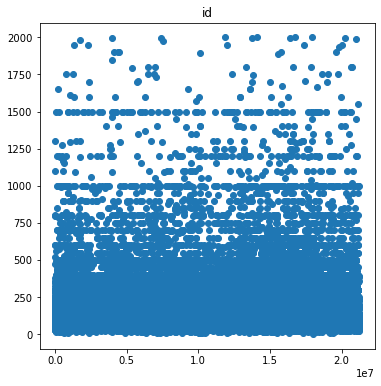

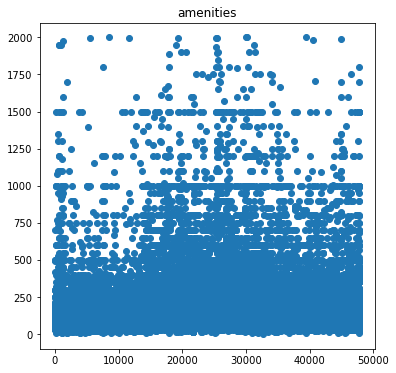

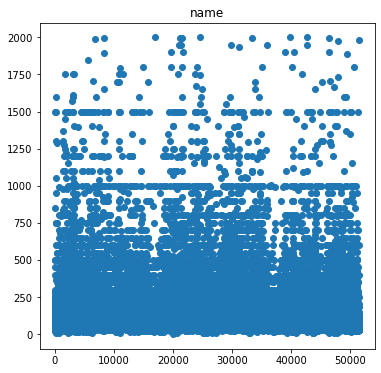

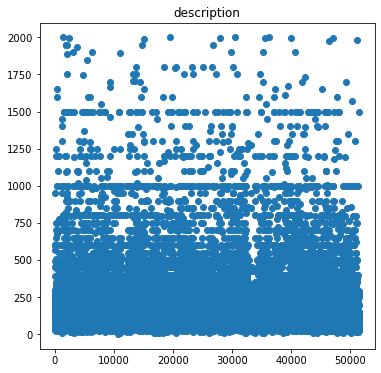

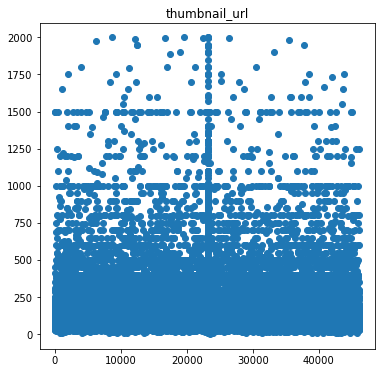

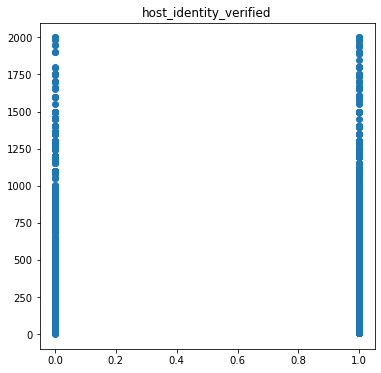

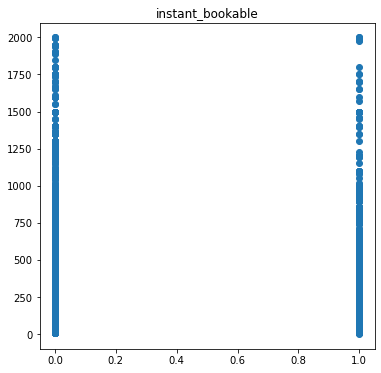

In [29]:
hapus=['id','amenities','name','description','thumbnail_url','host_identity_verified','instant_bookable']
for kolom in hapus:
    plt.figure(figsize=(6,6))
    plt.scatter(train[kolom],train.price)
    plt.title(kolom)
    plt.show()

In [32]:
#menghapus beberapa kolom yang tidak dibutuhkan untuk pemodelan
train=train.drop(['id','amenities','description','host_identity_verified','instant_bookable','name','thumbnail_url'],axis=1)
test_id=test.id
test=test.drop(['id','amenities','description','host_identity_verified','instant_bookable','name','thumbnail_url'],axis=1)

Data akhir yang digunakan untuk pemodelan adalah sebagai berikut

In [38]:
train.head()

,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,host_has_profile_pic,...,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price
0,0,0,3,1.0,4,2,1,4,1958,1,...,814,40.696524,-73.991617,72,2,100.0,180,1.0,1.0,150.0
1,0,0,7,1.0,4,2,1,4,2371,1,...,1246,40.766115,-73.989040,244,6,93.0,70,3.0,3.0,169.0
2,0,0,5,1.0,4,1,1,4,2274,1,...,1237,40.808110,-73.943756,239,10,92.0,79,1.0,3.0,145.0
3,17,0,4,1.0,4,0,1,5,2155,1,...,1100,37.772004,-122.431619,317,0,100.0,710,2.0,2.0,750.0
4,0,0,2,1.0,4,1,1,2,1557,1,...,1002,38.925627,-77.034596,113,4,40.0,321,0.0,1.0,115.0


## Pemodelan Data
Sebelum dilakukan pemodelan, data dibagi menjadi data training dan data testing dengan proporsi 20% data testing dan 80% data training. Kebaikan model dihitung berdasarkan nilai MAE (Mean Absolute Error). Peubah respon adalah kolom price, sementara kolom lain sebagai prediktor.

In [39]:
X=train.drop('price',axis=1)
y=train.price

In [40]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=1)

Beberapa metode digunakan untuk membangun model regresi, diantaranya Regresi Linear, Lasso, Elastic Net, Support Vector Machine, Regrression Tree, Random Forest, Gradient Boosting dan Extra Tree. Pada masing-masing metode dilakukan pemodelan terhadap data training, selanjutnya model diaplikasikan terhadap data testing dan dihitung nilai MAE prediksinya. Semua metode berasal dari package/ pip scikit learn (sklearn).

In [42]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor


In [43]:
#mendefinisikan model
regresi_linear=LinearRegression()
lasso=Lasso()
elastic=ElasticNet()
support=SVR()
tree_regression=DecisionTreeRegressor()
random_forest=RandomForestRegressor()
gradient_boosting=GradientBoostingRegressor()
extra=ExtraTreesRegressor()


In [30]:
#regresi linear
regresi_linear.fit(X_train,y_train)
prediksi1=regresi_linear.predict(X_test)
mae1=mean_absolute_error(y_test,prediksi1)
mae1

70.97289804122207

In [31]:
#lasso
lasso.fit(X_train,y_train)
prediksi2=lasso.predict(X_test)
mae2=mean_absolute_error(y_test,prediksi2)
mae2

70.44557234985297

In [32]:
#elasticnet
elastic.fit(X_train,y_train)
prediksi3=elastic.predict(X_test)
mae3=mean_absolute_error(y_test,prediksi3)
mae3

72.72254624225981

In [33]:
#support vector machine
support.fit(X_train,y_train)
prediksi4=support.predict(X_test)
mae4=mean_absolute_error(y_test,prediksi4)
mae4

87.65623379506056

In [34]:
#regresi pohon
tree_regression.fit(X_train,y_train)
prediksi5=tree_regression.predict(X_test)
mae5=mean_absolute_error(y_test,prediksi5)
mae5

74.43523515805708

In [39]:
#random forest
random_forest.fit(X_train,y_train)
prediksi6=random_forest.predict(X_test)
mae6=mean_absolute_error(y_test,prediksi6)
mae6

57.360244795682355

In [40]:
#gradientboosting
gradient_boosting.fit(X_train,y_train)
prediksi7=gradient_boosting.predict(X_test)
mae7=mean_absolute_error(y_test,prediksi7)
mae7

57.64818258628893

In [41]:
#extra tree regressor
extra.fit(X_train,y_train)
prediksi8=extra.predict(X_test)
mae8=mean_absolute_error(y_test,prediksi8)
mae8

60.72242675404782

Berdasarkan hasil di atas, model Random Forest dan Gradient Boosting memiliki MAE yang lebih kecil dibanding model-model yang lain. Selanjutnya dilakukan validasi silang (*cross validation*) untuk menentukan model terbaik. Validasi silang dilakukan dengan 10 lipatan pada masing-masing model dengan ukuran kebaikan model MAE

In [42]:
#cross validation
cross=[]
cross1=cross_val_score(regresi_linear, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
cross.append(np.mean(abs(cross1)))
cross2=cross_val_score(lasso, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
cross.append(np.mean(abs(cross2)))
cross3=cross_val_score(elastic, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
cross.append(np.mean(abs(cross3)))
cross4=cross_val_score(support, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
cross.append(np.mean(abs(cross4)))
cross5=cross_val_score(tree_regression, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
cross.append(np.mean(abs(cross5)))
cross6=cross_val_score(random_forest, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
cross.append(np.mean(abs(cross6)))
cross7=cross_val_score(gradient_boosting, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
cross.append(np.mean(abs(cross7)))
cross8=cross_val_score(extra, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
cross.append(np.mean(abs(cross8)))

In [43]:
model=['Linear Regression','Lasso','Elastic Net','Support Vector Machine','Tree Regression','Random Forest','Gradient Boosting','Extra Tree']
MAE=[mae1,mae2,mae3,mae4,mae5,mae6,mae7,mae8]

In [44]:
pd.DataFrame({'Model':model, 'Nilai MAE':MAE,'Cross Validasi':cross})

,Model,Nilai MAE,Cross Validasi
0,Linear Regression,70.972898,71.335344
1,Lasso,70.445572,70.763013
2,Elastic Net,72.722546,72.840952
3,Support Vector Machine,87.656234,88.143918
4,Tree Regression,74.435235,74.498730
5,Random Forest,57.360245,57.928111
6,Gradient Boosting,57.648183,57.652950
7,Extra Tree,60.722427,61.457180


Berdasarkan hasil validasi silang model Gradient Boosting memiliki nilai MAE paling kecil dibanding model yang lain, sehingga selanjutnya model Gradient Boosting digunakan untuk membangun model. Sebelum dilakukan pemodelan dengan Gradient Boosting dilakukan tuning hyperparameter untuk memperoleh hyperparameter terbaik. Tuning hyperparameter dilakukan dengan metode **GridSearchCV**, metode lain yang dapat digunakan untuk tuning hyperparameter adalah **RandomizedSearchCV**. Hyperparameter yang dituning adalah loss function, learning rate, estimator, dan max_depth.

In [5]:
from sklearn.model_selection import GridSearchCV

In [50]:
grid_params={
    'loss':['ls','lad','huber','quantile'],
    'learning_rate':[0.1,0.2,0.3,0.4,0.5],
    'n_estimators':[50,60,70,80,90,100],
    'max_depth':[3,5,7,9]
}

gs=GridSearchCV(
    GradientBoostingRegressor(),grid_params, scoring='neg_mean_absolute_error', cv=5)
gs_results=gs.fit(X_train, y_train)
print(abs(gs_results.best_score_))
print(gs_results.best_estimator_)
print(gs_results.best_params_)

50.28449281745524
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='lad', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
{'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 7, 'n_estimators': 100}


Hasil tuning hyperparameter di atas selanjutnya digunakan untuk membangun model Gradient Boosting. Data yang digunakan dalam membangun model akhir adalah keseluruhan data. Dan untuk melihat kebaikan model akhir dilakukan validasi silang.

In [51]:
gradient_boosting_tuning=gs_results.best_estimator_

In [45]:
gradient_boosting_tuning.fit(X,y)
cross_tuning=cross_val_score(gradient_boosting_tuning, X, y, cv=10, scoring='neg_mean_absolute_error')
np.mean(abs(cross_tuning))

49.51147955126804

## Prediksi Data Test
Setelah model akhir terbentuk dan nilai MAE dinilai cukup kecil selanjutnya adalah melakukan prediksi terhadap dataset test. Berikut adalah data test yang telah dilakukan pre-processing dan siap untuk diprediksi

In [46]:
test.head()

,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,host_has_profile_pic,...,host_since,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,16,0,4,1.5,4,2,1,3,1265,1,...,1992,754,33.875862,-118.403293,221,29,97.0,443,2.0,2.0
1,0,1,2,1.5,4,1,1,1,1813,1,...,989,917,41.908240,-87.695242,231,0,100.0,330,1.0,1.0
2,0,0,4,1.0,4,1,1,3,1651,1,...,1797,912,34.047003,-118.267352,132,73,99.0,378,1.0,1.0
3,16,1,2,1.0,4,1,1,3,1018,1,...,930,198,34.175360,-118.430904,491,2,100.0,573,1.0,1.0
4,0,0,4,1.0,4,1,1,2,1813,1,...,1969,917,38.911275,-77.037272,138,0,100.0,287,1.0,2.0


In [47]:
prediksi_test=gradient_boosting_tuning.predict(test)

In [49]:
hasil=pd.DataFrame({'id':test_id,'price':prediksi_test})
hasil.head(10)

,id,price
0,17423675,184.703169
1,6226658,65.606246
2,3563677,145.017678
3,17615783,83.302441
4,2479317,212.910737
5,14122244,144.217786
6,8908966,157.061701
7,12428036,83.453300
8,15238989,150.858186
9,5117069,95.511339


In [58]:
hasil.to_csv('SubmissionLaily.csv',index=False)